In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_org = pd.read_csv("smoke_detection_iot.csv")
data_org.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
data_org.drop(['Unnamed: 0','UTC', 'CNT'], axis = 1, inplace = True)

In [ ]:
data_org['Fire Alarm'] = data_org['Fire Alarm'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_org, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression

In [ ]:
import statsmodels.api as sm
x = train.drop('Fire Alarm', axis = 1)
xcols = x.columns
logit_model=sm.Logit(train['Fire Alarm'],x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.269558
         Iterations 11
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   Fire Alarm       Pseudo R-squared: 0.549     
Date:                 2023-09-16 17:24 AIC:              27035.8892
No. Observations:     50104            BIC:              27141.7514
Df Model:             11               Log-Likelihood:   -13506.   
Df Residuals:         50092            LL-Null:          -29942.   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       11.0000          Scale:            1.0000    
-------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
-------------------------------------------------------------------
Temperature[C]  -0.0475   0.0015 -32.1201 0.0000   -0.0504  -0.0446
Humidity[%]     -0.0218   0.0024  -9.000

In [ ]:
# Dropping insignificant variables

logit_model2=sm.Logit(train['Fire Alarm'],x.drop('PM2.5', axis = 1))
result=logit_model2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.269558
         Iterations 11
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   Fire Alarm       Pseudo R-squared: 0.549     
Date:                 2023-09-16 17:24 AIC:              27033.8892
No. Observations:     50104            BIC:              27130.9296
Df Model:             10               Log-Likelihood:   -13506.   
Df Residuals:         50093            LL-Null:          -29942.   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       11.0000          Scale:            1.0000    
-------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
-------------------------------------------------------------------
Temperature[C]  -0.0475   0.0015 -32.1202 0.0000   -0.0504  -0.0446
Humidity[%]     -0.0218   0.0024  -9.000

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x.drop('PM2.5', axis = 1), train['Fire Alarm'])

X_test = test[xcols].drop('PM2.5', axis = 1)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, test['Fire Alarm'])))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Fire Alarm'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3594
           1       0.87      0.98      0.93      8932

    accuracy                           0.89     12526
   macro avg       0.91      0.82      0.85     12526
weighted avg       0.89      0.89      0.88     12526



<Figure size 500x500 with 0 Axes>

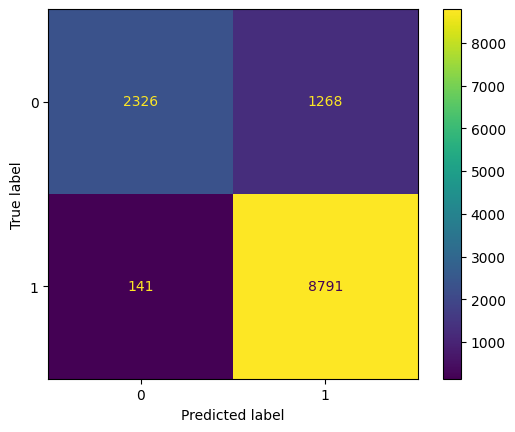

In [ ]:
y_test = test['Fire Alarm']

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize=(5, 5))
disp.plot(values_format='.0f')
plt.grid(False)
plt.show()

In [ ]:
y_pred_train = logreg.predict(x.drop('PM2.5', axis = 1))
accuracy = accuracy_score(train['Fire Alarm'], y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.8855580392783011


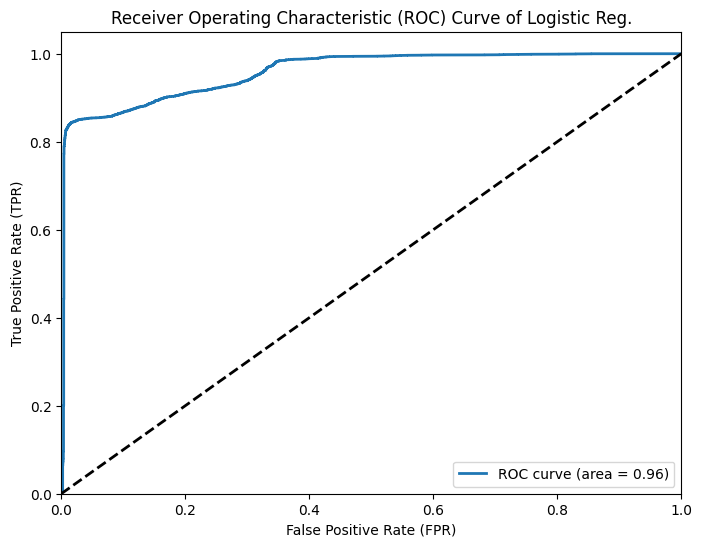

roc value 0.9588822777974239


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
X_test = test[xcols].drop("PM2.5", axis = 1)
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Reg.')
plt.legend(loc='lower right')
plt.show()

print("roc value", roc_auc)

# Logistic with Regularization

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x, train['Fire Alarm'])

RandomForestClassifier(random_state=42)

In [ ]:
#print(rf.get_params())

In [ ]:
X_test = test[xcols]
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [ ]:
y_pred_train = rf.predict(x)
accuracy = accuracy_score(train['Fire Alarm'], y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x.columns,
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    output_file = f"tree_{i+1}.png"
    graph.render(output_file, format="png")

<Figure size 500x500 with 0 Axes>

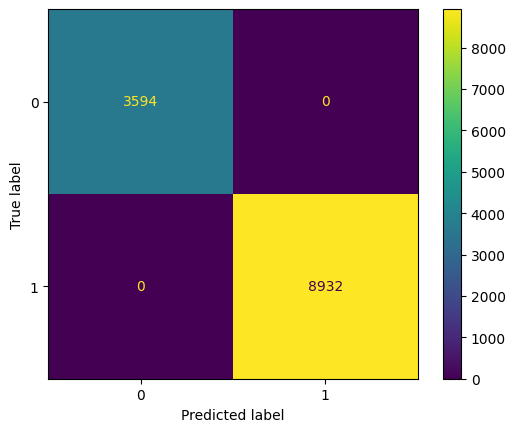

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize=(5, 5))
disp.plot(values_format='.0f')
plt.grid(False)
plt.show()

## Feature Selection

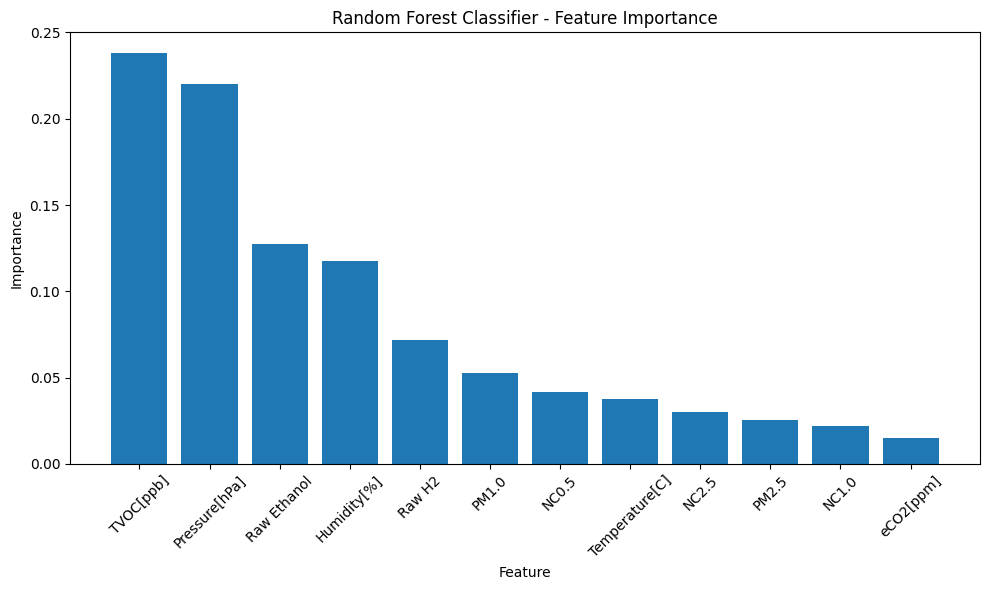

In [ ]:
importances = rf.feature_importances_

# Get feature names (assuming they are labeled)
feature_names = xcols

# Sort the features by importance in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot for variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Classifier - Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
selected_features = sorted_feature_names[:4]

In [ ]:
rf_selected = RandomForestClassifier(random_state = 42)
rf_selected.fit(x[selected_features], train['Fire Alarm'])

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_selected.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

y_pred_train = rf_selected.predict(x[selected_features])
accuracy = accuracy_score(train['Fire Alarm'], y_pred_train)
print("Train Accuracy:", accuracy)

Test Accuracy: 0.9998403321092129
Train Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997      3594
           1     0.9998    1.0000    0.9999      8932

    accuracy                         0.9998     12526
   macro avg     0.9999    0.9997    0.9998     12526
weighted avg     0.9998    0.9998    0.9998     12526



<Figure size 500x500 with 0 Axes>

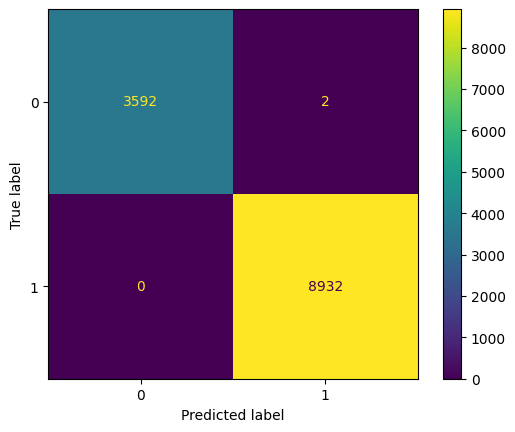

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize=(5, 5))
disp.plot(values_format='.0f')
plt.grid(False)
plt.show()

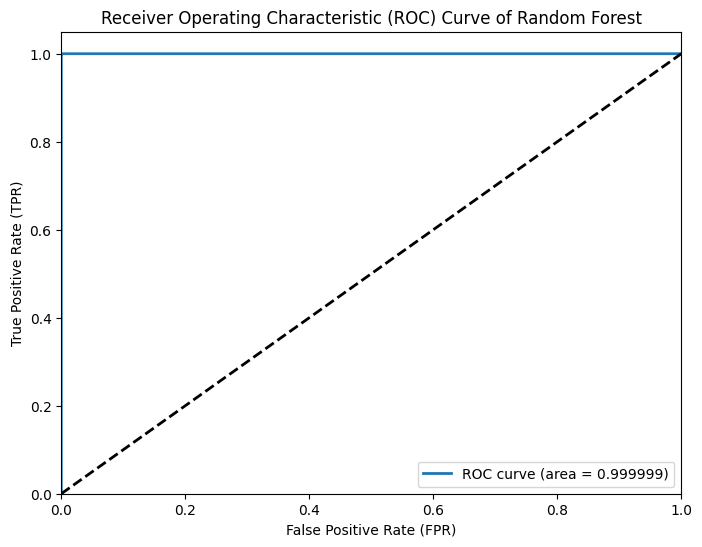

roc value 0.9999990187407434


In [ ]:
y_prob = rf_selected.predict_proba(X_test[selected_features])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend(loc='lower right')
plt.show()

print("roc value", roc_auc)

In [ ]:
for i in range(3):
    tree = rf_selected.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=selected_features,
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    output_file = f"tree_{i+1}.png"
    graph.render(output_file, format="png")

<Figure size 2000x1500 with 0 Axes>

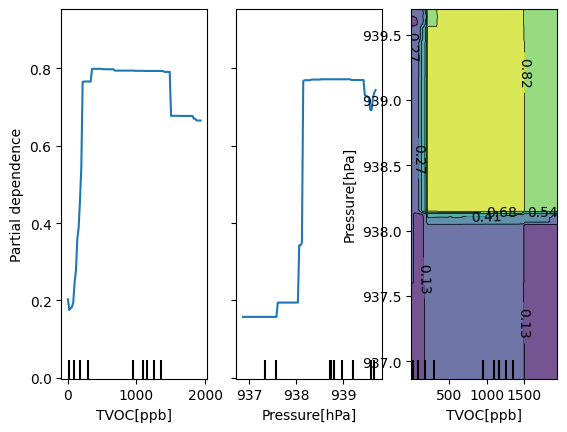

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [0, 1, (0, 1)]
subset = x[selected_features].sample(n = 500)
plt.figure(figsize=(20, 15))
PartialDependenceDisplay.from_estimator(rf_selected, subset, features)

In [ ]:
# Fit the model with whole dataset

#rf.fit(data_org[xcols], data_org['Fire Alarm'])

In [ ]:
#!pip install shap

import shap

# load JS visualization code to notebook
shap.initjs()

X_test = X_test[selected_features]
# Create the explainer
explainer = shap.TreeExplainer(rf_selected)
#explainer = shap.Explainer(rf_selected)
shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


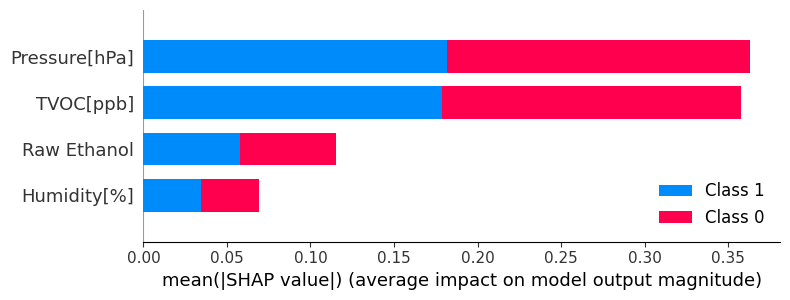

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

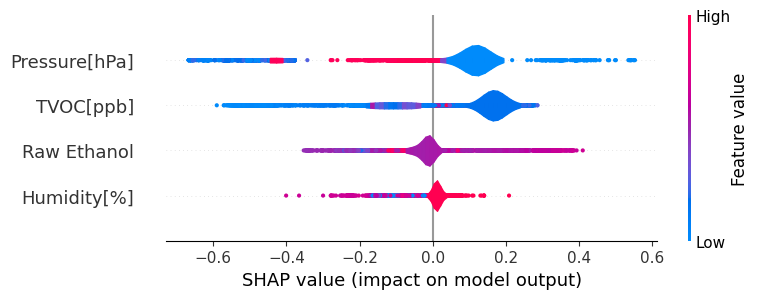

In [ ]:
#shap.summary_plot(shap_values[1], X_test , plot_type='violin')
shap.summary_plot(shap_values[1], X_test , plot_type='violin')

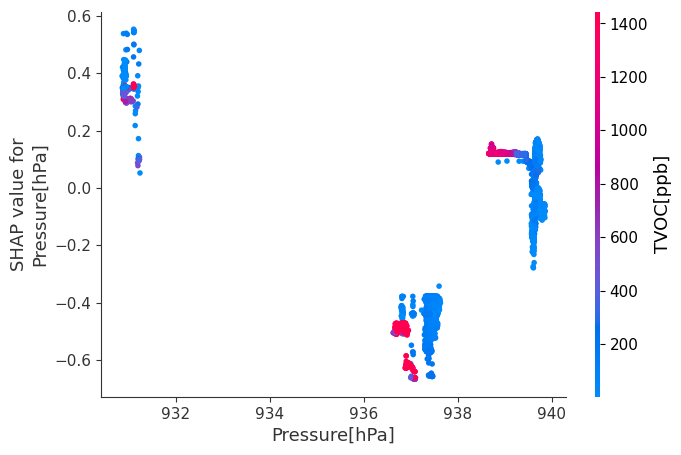

In [ ]:
shap.dependence_plot("Pressure[hPa]", shap_values[1], X_test,interaction_index="TVOC[ppb]")

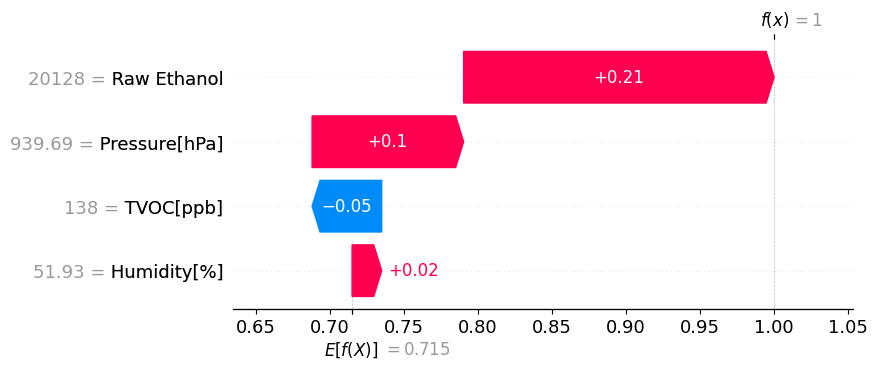

In [ ]:
explainer_2 = shap.Explainer(rf_selected)
shap_values_2 = explainer_2(X_test)
shap.plots.waterfall(shap_values_2[0,:,1])

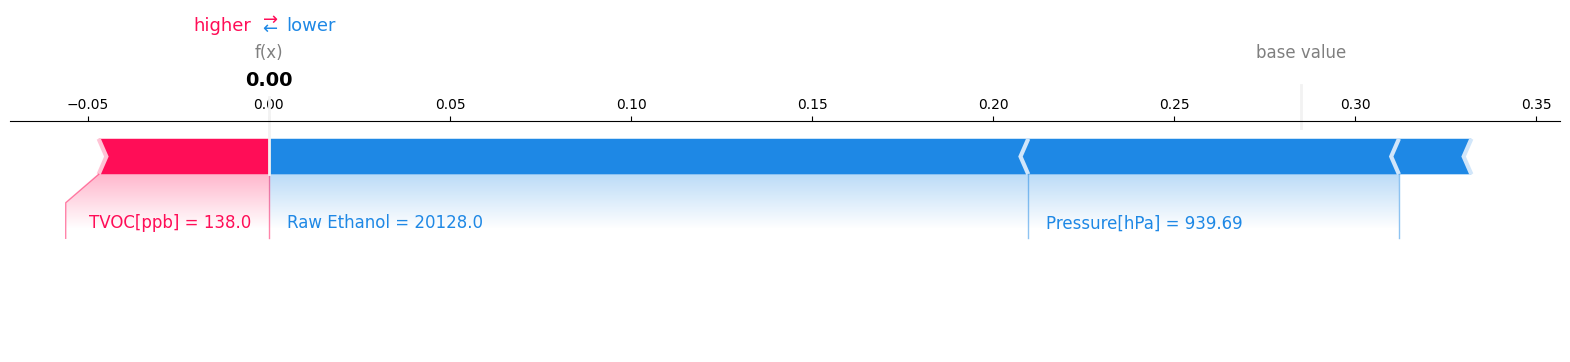

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

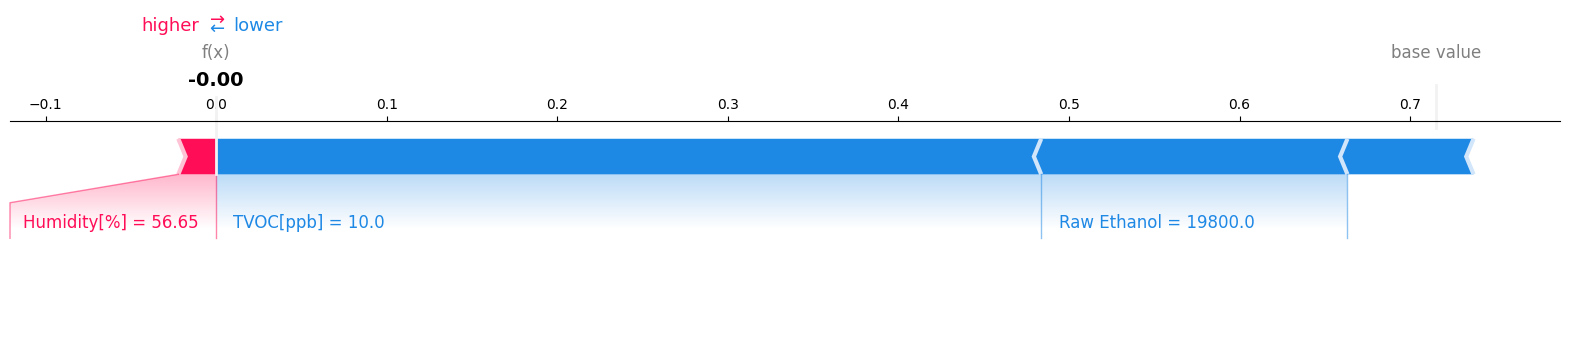

In [ ]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

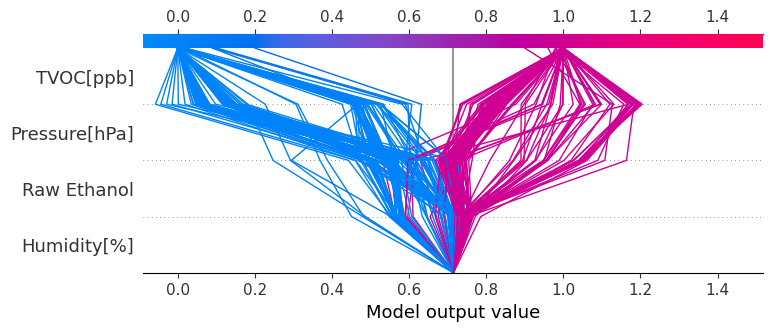

In [ ]:
subset = X_test.sample(n = 500)
shap_values_2 = explainer.shap_values(subset)
shap.decision_plot(explainer.expected_value[1], shap_values_2[1], subset.columns)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_2[1], subset)

In [ ]:
import random
random.seed(123)
random_number = random.randint(0, X_test.shape[0])
print(random_number)

857


In [ ]:
test.iloc[857]

In [ ]:
choosen_instance = X_test.iloc[857]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
test.iloc[2098]

In [ ]:
choosen_instance = X_test.iloc[2098]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)